In [1]:
# Instalamos las librerías necesarias

%pip install matplotlib opencv-python-headless


In [2]:
# Cargamos las librerías necesarias para la práctica
# https://docs.opencv.org/4.x/index.html
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
print ('Version CV '+cv2.__version__)

Version CV 4.11.0


# 1. Cargamos el vídeo

In [16]:
current_path = os.getcwd()
print(current_path)
vid = cv2.VideoCapture(current_path+'/2.-motionvideo.mp4')

/content


In [17]:
frames = []
while(True):
    ret, frame = vid.read()
    if not ret:
        break
    frames.append(frame)
vid.release()

print(f"Cargados {len(frames)}")

Cargados 876


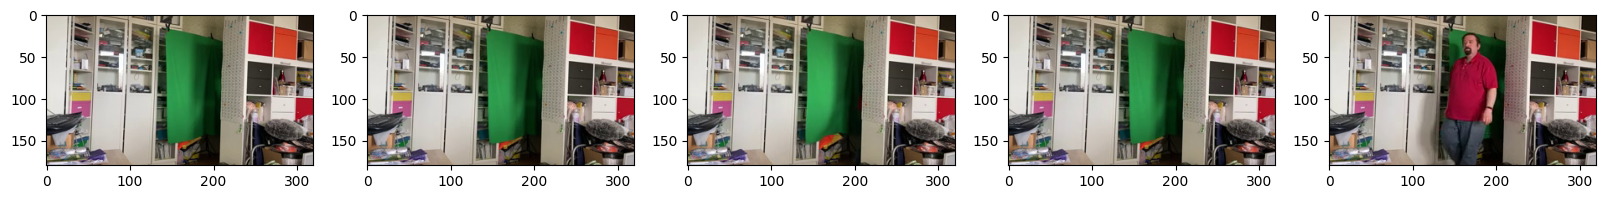

In [19]:
fig, axs = plt.subplots(1,5,figsize=(20,20))
for i in range(5):
    frame_rgb = cv2.cvtColor(frames[i*150], cv2.COLOR_BGR2RGB)
    axs[i].imshow(frame_rgb)

In [20]:
# Convertimos a blanco y negro
frames_bn = []
for frame in frames:
    frame_bn = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frames_bn.append(frame_bn)

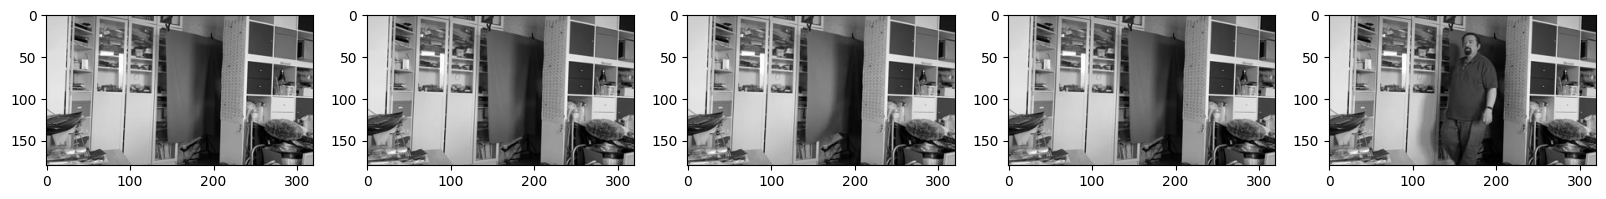

In [31]:
# Mostramos los frames
fig, axs = plt.subplots(1,5,figsize=(20,20))
for i in range(5):
    axs[i].imshow(frames_bn[i*150],cmap='gray')

# 2. Analizando las imágenes

In [24]:
# Calcula las diferencias entre 2 frames consecutivos
diffs = []
for i in range(len(frames_bn)-1):
    diff = cv2.absdiff(frames_bn[i], frames_bn[i+1])
    diffs.append(diff)

In [29]:
# Normalizamos los valores de movimiento
diffs_norm = np.array([np.linalg.norm(diff) for diff in diffs])
print(diffs_norm.shape)


(875,)


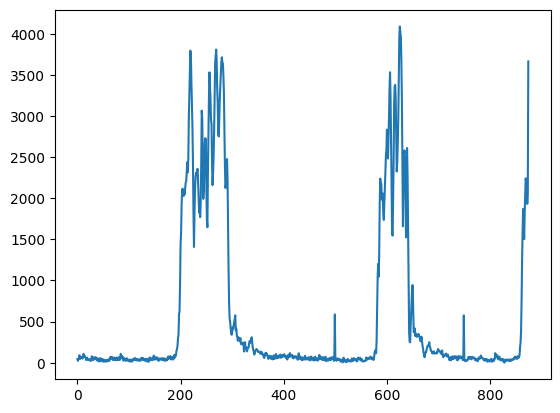

In [30]:
# Representamos la cantidad de moviento de cada par de frames
plt.plot(diffs_norm)

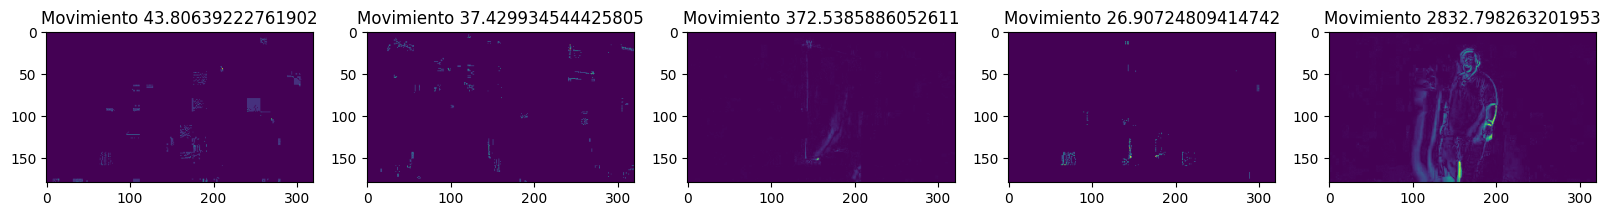

In [37]:
# Mostramos los frames
fig, axs = plt.subplots(1,5,figsize=(20,20))
for i in range(5):
    axs[i].imshow(diffs[i*150])
    axs[i].set_title(f"Movimiento {diffs_norm[i*150]}")

# 3. Identificando las zonas con moviento

In [40]:
# Establecer el umbral
threshold = 1500

# Lista para almacenar los indices de los frames con movimiento
frames_movement = []

# Iterar sobre los frames
for i, frame in enumerate(frames):
    if i == 0:
        continue
    diff = diffs_norm[i-1]
    if diff > threshold:
        frames_movement.append(i)

In [41]:
print(frames_movement)

[202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875]
